In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [21]:
house_price_dataset = sklearn.datasets.fetch_california_housing()


In [22]:
# convert into df
df = pd.DataFrame(house_price_dataset.data, columns=house_price.feature_names)

In [23]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25


In [25]:
# add the target (price) col to df
df["price"] = house_price_dataset.target

In [26]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [28]:
df.shape

(20640, 9)

In [30]:
# check missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [31]:
# statistical measure of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# understanding the correlation between various feature in the dataset

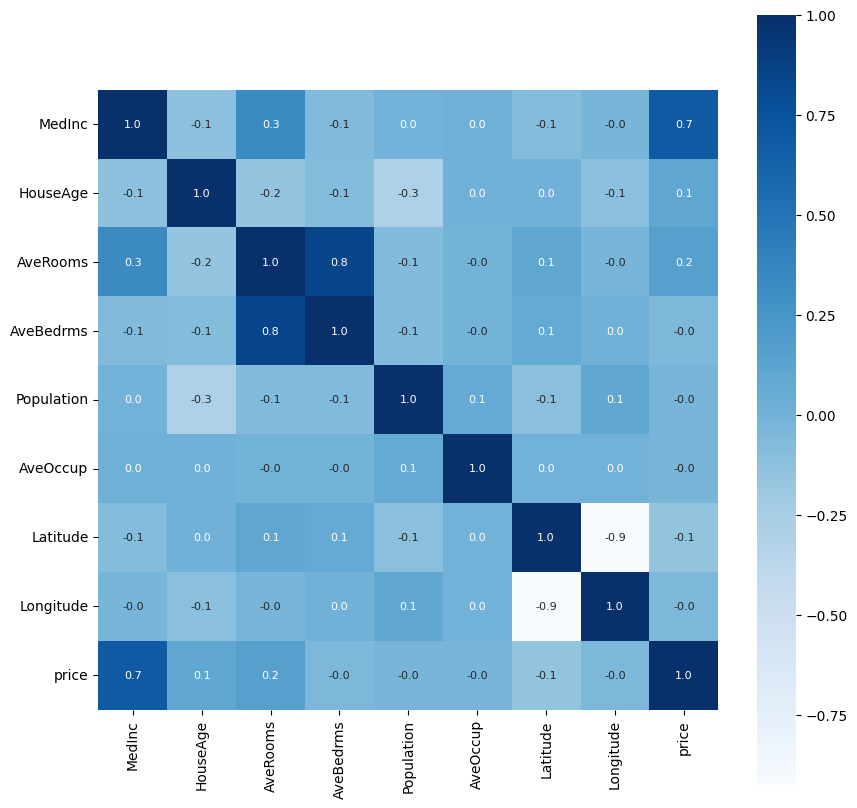

In [38]:
correlation = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',                 
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)
plt.show()
plt.show()

In [41]:
X = df.drop(['price'],axis=1)
Y = df['price']

In [42]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [44]:
# splitting the data into train-test
X_train, X_test, Y_train , Y_test = train_test_split(X, Y ,test_size=0.2, random_state=2)


In [45]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [47]:
# Train Model
model = XGBRegressor()

In [48]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [50]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [56]:
# RSE
score_1 = metrics.r2_score(Y_train,training_data_prediction)

# MAE
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared Error", score_1)
print("Mean Absolute Error", score_2)

R squared Error 0.943650140819218
Mean Absolute Error 0.1933648700612105


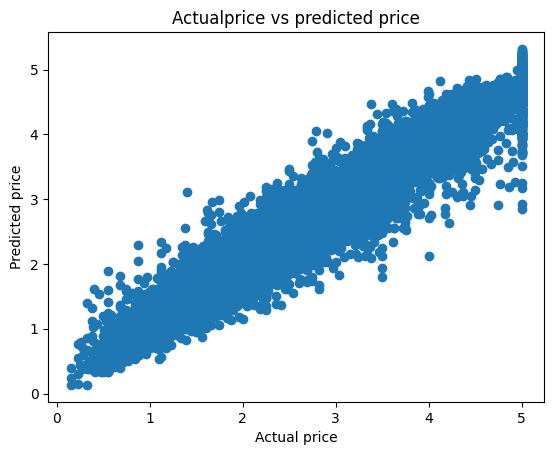

In [59]:
# visualize the actual and predicted data
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actualprice vs predicted price")
plt.show()

In [58]:
# Prediction on test data
test_data_prediction = model.predict(X_test)
# RSE
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# MAE
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared Error", score_1)
print("Mean Absolute Error", score_2)

R squared Error 0.8338000331788725
Mean Absolute Error 0.3108631800268186
